The Label for the image shown is: mask_weared_incorrect
----------------------------------------------------------------------------
Number of Batches (batch size = 100) | Train: 72| Test: 1
Data Shape: torch.Size([3, 128, 128])
Classes: ['mask_weared_incorrect', 'with_mask', 'without_mask']
----------------------------------------------------------------------------


(<__main__.ImageLoader at 0x1faee4469b0>,
 <torch.utils.data.dataloader.DataLoader at 0x1faee7d3a20>)

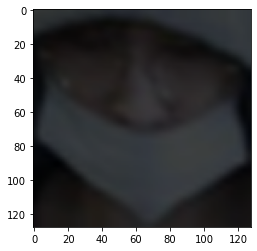

In [5]:
"""
The ImageLoader Class takes a dataset_location as input, and returns a ImageLoader class object.
        Functions (complete desciptions are available in each function):
"""

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


class ImageLoader:
    def __init__(self, dataset_location):
        self.dataset_location = dataset_location
        self.dataset = None
        self.imageset = None
        self.shape = None

        # Load the Data, Images & Acquire the Shape
        self.load_data()
        self.load_images()
        self.get_shape()

    def load_data(self):
        """
        Takes a dataset location as input, applies certain augmentations,
        and returns an Image Folder object as output.
                Parameters:
                    self.dataset_location (str): The location of your datset structure.
                Returns (updates attribute):
                    self.dataset: An Image Folder object
        """

        dataset = torchvision.datasets.ImageFolder(
            root=f"{self.dataset_location}",
            transform=transforms.Compose(
                [transforms.ToTensor(), transforms.RandomHorizontalFlip(p=0.5)]
            ),
        )

        self.dataset = dataset

        pass

    def load_images(self):
        """
        Takes a dataset location as input, applies zero augmentations, and returns an Image Folder object as output.
                Parameters:
                    self.dataset_location (str): The location of your datset structure.
                Returns:
                    self.imageset: An Image Folder object
        """
        imageset = torchvision.datasets.ImageFolder(root=f"{self.dataset_location}")
        self.imageset = imageset

    def get_shape(self):
        """
        Returns the shape of the first sample in an Image Folder Object (must be of tensor)
                Parameters:
                    self.dataset: An Image Folder Object with totensor() applied.
                Returns (updates attribute):
                    self.shape: The shape of the first sample in dataset.
        """
        self.shape = self.dataset[0][0].shape
        pass

    def get_image(self, sample_number, juypter=True):
        """
        Plots the Image of a given sample in an Image Folder object.
            Parameters:
                'self.imageset': An Image Folder object consisting of images
                'sample_number' (int): representing the sample to be plotted
            Returns:
                pass
        """

        image = self.imageset[sample_number][0]
        image_label = self.imageset[sample_number][1]

        # print(f"The Label for the image shown is: {image_label}")
        print(f"The Label for the image shown is: {self.imageset.classes[image_label]}")
        plt.imshow(image)
        # If you wish to pause the program on the image (non-Juypter Notebook)
        if juypter == False:
            plt.show(block=False)
            input("press <ENTER> to continue")

        pass

    def FoldertoLoader(self, batch_size, test_percent):
        """
        Returns two DataLoader objects for training and testing.
                Parameters:
                    dataset: An Image Folder Object
                    batch_size (int): The number of samples per batch
                    test_percent (int): Multiplied by the len of dataset returns the test size

                Returns:
                    train_data: A DataLoader object for training
                    test_data: A Dataloader object for testing
        """
        if test_percent > 0:
            test_size = int(test_percent * len(self.dataset))
            train_size = len(self.dataset) - test_size
            train_set, test_set = torch.utils.data.random_split(
                self.dataset, [train_size, test_size]
            )

            train_data = torch.utils.data.DataLoader(
                train_set, batch_size=batch_size, shuffle=True
            )
            test_data = torch.utils.data.DataLoader(
                test_set, batch_size=len(test_set), shuffle=True
            )  # Changed Batch_Size to len(test_set)

            return train_data, test_data

        elif test_percent == 0:

            all_data = torch.utils.data.DataLoader(
                self.dataset, batch_size=batch_size, shuffle=True
            )
            return all_data


def process_image_data(dataset_location, sample_number, batch_size, test_percent):

    # Create Data Object
    image_loader = ImageLoader(dataset_location)

    # Load an Image
    image_loader.get_image(sample_number=sample_number)

    # Test DataLoader
    if test_percent > 0:
        train_data, test_data = image_loader.FoldertoLoader(
            batch_size=batch_size, test_percent=test_percent
        )
        print(
            "----------------------------------------------------------------------------"
        )
        print(
            f"Number of Batches (batch size = {batch_size}) | Train: {len(train_data) }| Test: {len(test_data)}"
        )
        print(
            f"Data Shape: {image_loader.shape}\nClasses: {image_loader.dataset.classes}"
        )
        print(
            "----------------------------------------------------------------------------"
        )

        return image_loader, train_data, test_data

    elif test_percent == 0:

        all_data = image_loader.FoldertoLoader(
            batch_size=batch_size, test_percent=test_percent
        )
        print(
            "----------------------------------------------------------------------------"
        )
        print(
            f"Number of Batches (batch size = {batch_size}) | All_Data: {len(all_data)}"
        )
        print(
            f"Data Shape: {image_loader.shape}\nClasses: {image_loader.dataset.classes}"
        )
        print(
            "----------------------------------------------------------------------------"
        )

        return image_loader, all_data


# dataset_location = 'X:\\Work\\Work Datasets\\Projects\\COVID\\Dataset'
dataset_location = "X:\\Work\\Work Datasets\\Teaching_Datasets\\COVID\\Dataset"
sample_number = 50
batch_size = 100
test_percent = 0.2


process_image_data(dataset_location=dataset_location, sample_number=sample_number,batch_size=batch_size,test_percent=test_percent)

In [2]:
image_loader

torch.Size([3, 128, 128])